In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import astropy.io.fits

In [51]:
from astropy.io import fits
#Shorten eachname 
f160file = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"
f125file = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
f105file = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

#Load FITS
def load_fits_data(file):
    with fits.open(file) as hdul:
        return hdul[0].data

f160w = load_fits_data(f160file)
f125w = load_fits_data(f125file)
f105w = load_fits_data(f105file)

#Normalize each filter data
def normalize_image(data, stretch=0.02):
    #For contrast
    vmin = np.percentile(data, stretch)
    vmax = np.percentile(data, 100 - stretch)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    return norm(data)

red = normalize_image(f160w)
green = normalize_image(f125w)
blue = normalize_image(f105w)

# Stack the RGB channels into a 3D array
rgb_image = np.stack([red, green, blue], axis=-1)


Text(0.5, 1.0, 'Colored Hubble Ultra Deep Field')

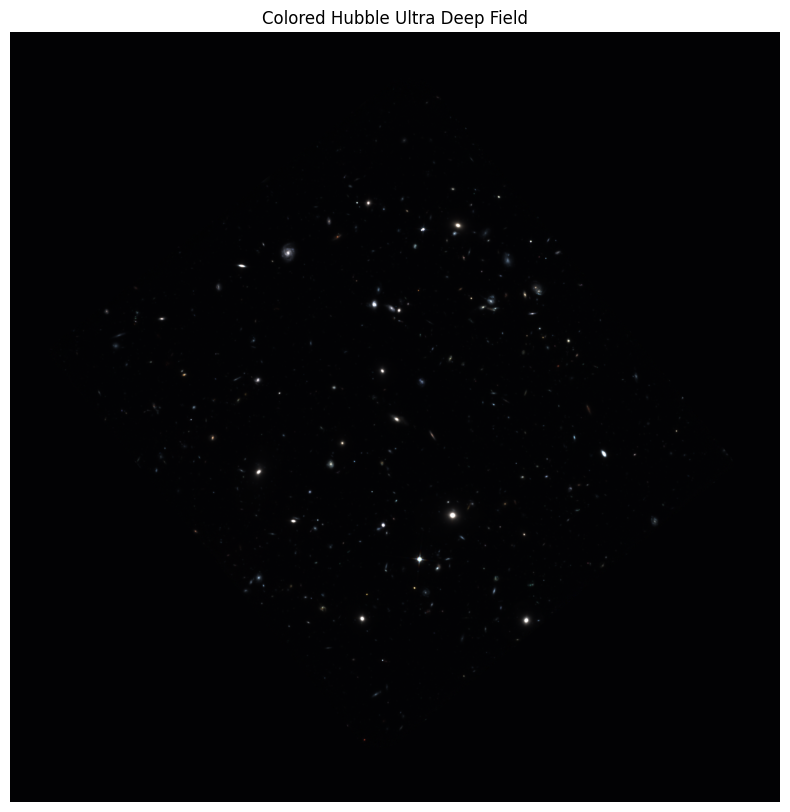

In [52]:
#Display image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.axis('off')
plt.title("Colored Hubble Ultra Deep Field")

In [53]:
# Save the image as a PNG
plt.savefig("Colored Hubble Ultra Deep Field.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x800 with 0 Axes>